# Grouping the data in preparation for correlation matrix


In [ ]:
import seaborn as sb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
#%pip install pymannkendall
import pymannkendall as mk

In [ ]:
grouped = data_combined_2017.groupby(['STATE_NAME', 'CountyName']).agg({
    'ResultMeasureValue': 'mean',
    'CROP_ACR17': 'mean',
    'NO_FARMS17': 'mean',
    'AVE_SALE17': 'mean',
    'AVE_SIZE17': 'mean',
    'POPULATION': 'mean',
    'POP_SQMI': 'mean',
    'county_funding': 'mean',
    'state_funding': 'mean',
    'total_county_state': 'mean',
    'poverty_count_in_last12month' : 'mean',
       'gini_index': 'mean'
            })

# Correlation Matrix for crop acreage and phos value


In [ ]:
grouped_means = grouped[['ResultMeasureValue', 'CROP_ACR17', 'NO_FARMS17','AVE_SIZE17','AVE_SALE17','POPULATION','county_funding','gini_index']]

grouped_means.rename(columns={'ResultMeasureValue': 'Phosphorus Level', 'CROP_ACR17': "Crop Acreage",
                    'NO_FARMS17': 'Farm Count', 'AVE_SIZE17': 'Farm Size', 'AVE_SALE17': 'Farm Sales',
                    'POPULATION': 'Population', 'county_funding':'County Funding', 'gini_index': 'Gini Index'}, inplace=True)

corr = grouped_means.corr()

print(corr)

In [ ]:
corr.style.background_gradient(cmap='GnBu', axis=None)


In [ ]:

corr = grouped_means.corr()
ax = plt.axes()
sb.heatmap(corr, cmap="GnBu", annot=True, ax = ax)
ax.set_title('2017 Data, No Lag')
plt.savefig('2017corr_updated.png', bbox_inches='tight', pad_inches=0.0)

In [ ]:
plt.savefig('corr.png', bbox_inches='tight', pad_inches=0.0)


# County-level Analysis
Using the modeling_pivot.csv


In [2]:
data = pd.read_csv('modeling_pivot.csv')
data.drop(columns=['2023', '2024'], inplace=True)
# imputed_df = pd.read_csv('imputed_df.csv')
inspection_data = pd.read_csv('data_usgs_GL2.csv')

In [3]:
data.set_index(keys='CountyState', inplace=True)
data

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
CountyState,,,,,,,,,,,,,
Adams County-Illinois,0.212773,0.083278,0.079962,0.088600,0.184000,0.168962,0.095857,0.180462,0.293333,0.240038,0.201500,0.088063,0.113900
Adams County-Indiana,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.326250,NaN,NaN,NaN,NaN
Adams County-Pennsylvania,NaN,0.038800,0.214875,NaN,0.009500,0.009200,0.025464,0.014250,0.017000,0.021368,0.084667,0.014500,NaN
Adams County-Wisconsin,NaN,NaN,NaN,NaN,0.058500,0.045000,NaN,NaN,NaN,0.043963,0.028336,0.037300,0.031746
Aitkin County-Minnesota,0.048714,0.057060,0.054819,0.025509,0.036486,0.043529,0.052363,0.046199,0.052723,0.036561,0.035376,0.035049,0.142786
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming County-New York,0.122400,0.038155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wyoming County-Pennsylvania,0.056833,0.049056,0.071138,0.062353,0.049254,0.117083,0.048571,0.046608,0.045949,0.038340,0.042619,0.045100,0.048700
Yates County-New York,NaN,NaN,0.008390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.mean()

2010    0.132068
2011    0.136220
2012    0.141622
2013    0.140631
2014    0.132509
2015    0.119496
2016    0.119286
2017    0.126117
2018    0.158888
2019    0.141230
2020    0.129008
2021    0.117607
2022    0.130848
dtype: float64

## County-level Descriptive Stats

In [5]:
data = data.apply(pd.to_numeric, errors='coerce')
metrics = data.copy()
metrics['all_years_mean'] = data.apply(lambda row: row.mean(), axis=1)
metrics

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,all_years_mean
CountyState,,,,,,,,,,,,,,
Adams County-Illinois,0.212773,0.083278,0.079962,0.088600,0.184000,0.168962,0.095857,0.180462,0.293333,0.240038,0.201500,0.088063,0.113900,0.156210
Adams County-Indiana,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.326250,NaN,NaN,NaN,NaN,0.288125
Adams County-Pennsylvania,NaN,0.038800,0.214875,NaN,0.009500,0.009200,0.025464,0.014250,0.017000,0.021368,0.084667,0.014500,NaN,0.044962
Adams County-Wisconsin,NaN,NaN,NaN,NaN,0.058500,0.045000,NaN,NaN,NaN,0.043963,0.028336,0.037300,0.031746,0.040807
Aitkin County-Minnesota,0.048714,0.057060,0.054819,0.025509,0.036486,0.043529,0.052363,0.046199,0.052723,0.036561,0.035376,0.035049,0.142786,0.051321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming County-New York,0.122400,0.038155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080277
Wyoming County-Pennsylvania,0.056833,0.049056,0.071138,0.062353,0.049254,0.117083,0.048571,0.046608,0.045949,0.038340,0.042619,0.045100,0.048700,0.055508
Yates County-New York,NaN,NaN,0.008390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008390


In [6]:
# Add column for number of years missing by county
metrics['num_years_missing'] = data.isna().sum(axis=1)
metrics

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,all_years_mean,num_years_missing
CountyState,,,,,,,,,,,,,,,
Adams County-Illinois,0.212773,0.083278,0.079962,0.088600,0.184000,0.168962,0.095857,0.180462,0.293333,0.240038,0.201500,0.088063,0.113900,0.156210,0
Adams County-Indiana,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.326250,NaN,NaN,NaN,NaN,0.288125,11
Adams County-Pennsylvania,NaN,0.038800,0.214875,NaN,0.009500,0.009200,0.025464,0.014250,0.017000,0.021368,0.084667,0.014500,NaN,0.044962,3
Adams County-Wisconsin,NaN,NaN,NaN,NaN,0.058500,0.045000,NaN,NaN,NaN,0.043963,0.028336,0.037300,0.031746,0.040807,7
Aitkin County-Minnesota,0.048714,0.057060,0.054819,0.025509,0.036486,0.043529,0.052363,0.046199,0.052723,0.036561,0.035376,0.035049,0.142786,0.051321,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming County-New York,0.122400,0.038155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080277,11
Wyoming County-Pennsylvania,0.056833,0.049056,0.071138,0.062353,0.049254,0.117083,0.048571,0.046608,0.045949,0.038340,0.042619,0.045100,0.048700,0.055508,0
Yates County-New York,NaN,NaN,0.008390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008390,12


In [7]:
# Add column for percentage of year missing by county
metrics['perc_num_years_missing'] = metrics['num_years_missing']/12
metrics

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,all_years_mean,num_years_missing,perc_num_years_missing
CountyState,,,,,,,,,,,,,,,,
Adams County-Illinois,0.212773,0.083278,0.079962,0.088600,0.184000,0.168962,0.095857,0.180462,0.293333,0.240038,0.201500,0.088063,0.113900,0.156210,0,0.000000
Adams County-Indiana,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.326250,NaN,NaN,NaN,NaN,0.288125,11,0.916667
Adams County-Pennsylvania,NaN,0.038800,0.214875,NaN,0.009500,0.009200,0.025464,0.014250,0.017000,0.021368,0.084667,0.014500,NaN,0.044962,3,0.250000
Adams County-Wisconsin,NaN,NaN,NaN,NaN,0.058500,0.045000,NaN,NaN,NaN,0.043963,0.028336,0.037300,0.031746,0.040807,7,0.583333
Aitkin County-Minnesota,0.048714,0.057060,0.054819,0.025509,0.036486,0.043529,0.052363,0.046199,0.052723,0.036561,0.035376,0.035049,0.142786,0.051321,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming County-New York,0.122400,0.038155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080277,11,0.916667
Wyoming County-Pennsylvania,0.056833,0.049056,0.071138,0.062353,0.049254,0.117083,0.048571,0.046608,0.045949,0.038340,0.042619,0.045100,0.048700,0.055508,0,0.000000
Yates County-New York,NaN,NaN,0.008390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008390,12,1.000000


In [ ]:
last_5_avg = pd.DataFrame(data.iloc[:, -5:].mean(axis=1, skipna=True), columns=['avg'])
last_5_avg

In [ ]:
avg = last_5_avg['avg']
avg = np.array(avg)
metrics['last_5_years_avg'] = avg
metrics

In [8]:
print(metrics['num_years_missing'].mean())
print(metrics['num_years_missing'].median())

5.110576923076923
6.0


In [9]:
print(metrics['perc_num_years_missing'].mean())
print(metrics['perc_num_years_missing'].median())

0.42588141025641024
0.5


In [10]:
metrics.reset_index(inplace=True)
metrics.columns

Index(['CountyState', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', 'all_years_mean',
       'num_years_missing', 'perc_num_years_missing'],
      dtype='object')

In [11]:
metrics[['County', 'State']] = metrics['CountyState'].str.split('-', expand=True)
metrics

,CountyState,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,all_years_mean,num_years_missing,perc_num_years_missing,County,State
0,Adams County-Illinois,0.212773,0.083278,0.079962,0.088600,0.184000,0.168962,0.095857,0.180462,0.293333,0.240038,0.201500,0.088063,0.113900,0.156210,0,0.000000,Adams County,Illinois
1,Adams County-Indiana,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.326250,NaN,NaN,NaN,NaN,0.288125,11,0.916667,Adams County,Indiana
2,Adams County-Pennsylvania,NaN,0.038800,0.214875,NaN,0.009500,0.009200,0.025464,0.014250,0.017000,0.021368,0.084667,0.014500,NaN,0.044962,3,0.250000,Adams County,Pennsylvania
3,Adams County-Wisconsin,NaN,NaN,NaN,NaN,0.058500,0.045000,NaN,NaN,NaN,0.043963,0.028336,0.037300,0.031746,0.040807,7,0.583333,Adams County,Wisconsin
4,Aitkin County-Minnesota,0.048714,0.057060,0.054819,0.025509,0.036486,0.043529,0.052363,0.046199,0.052723,0.036561,0.035376,0.035049,0.142786,0.051321,0,0.000000,Aitkin County,Minnesota
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Wyoming County-New York,0.122400,0.038155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080277,11,0.916667,Wyoming County,New York
620,Wyoming County-Pennsylvania,0.056833,0.049056,0.071138,0.062353,0.049254,0.117083,0.048571,0.046608,0.045949,0.038340,0.042619,0.045100,0.048700,0.055508,0,0.000000,Wyoming County,Pennsylvania
621,Yates County-New York,NaN,NaN,0.008390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008390,12,1.000000,Yates County,New York
622,Yellow Medicine County-Minnesota,0.223333,0.205284,0.214338,0.320311,0.284762,0.180660,0.140053,0.161822,0.346594,0.252153,0.146827,0.118061,0.228598,0.217138,0,0.000000,Yellow Medicine County,Minnesota


In [12]:
inspection_data

,Unnamed: 0,OrganizationIdentifier,ActivityMediaSubdivisionName,ActivityStartDate,ResultMeasureValue,ResultMeasure/MeasureUnitCode,ActivityLocation/LatitudeMeasure,ActivityLocation/LongitudeMeasure,HydrologicEvent,position,geometry,index_right,ZIP_CODE,PO_NAME,STATE,POPULATION,POP_SQMI,SQMI,Shape_Length,Shape_Area
0,2,MNPCA,Surface Water,2010-09-01,0.0610,mg/L,44.926900,-93.362400,NaN,375302,POINT (-93.3624 44.9269),18094.0,55426,Minneapolis,MN,27234.0,3885.02,7.01,0.288734,0.002071
1,5,MNPCA,Surface Water,2010-06-24,0.4540,mg/L,43.513917,-93.268611,NaN,375305,POINT (-93.268611 43.513917),18306.0,56036,Glenville,MN,1726.0,15.08,114.48,1.084185,0.033023
2,8,MNPCA,Surface Water,2010-08-16,0.0140,mg/L,46.931197,-94.772603,NaN,375308,POINT (-94.772603 46.931197),18582.0,56467,Nevis,MN,2580.0,17.10,150.90,1.706309,0.046198
3,14,MNPCA,Surface Water,2010-09-07,0.3670,mg/L,43.590170,-94.681010,NaN,375315,POINT (-94.68101 43.59017),18401.0,56171,Sherburn,MN,1684.0,16.88,99.77,0.965920,0.028837
4,17,MNPCA,Surface Water,2010-07-27,0.0190,mg/L,45.705203,-94.747231,NaN,375318,POINT (-94.747231 45.705203),18525.0,56352,Melrose,MN,5644.0,50.00,112.89,1.368967,0.033745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456703,1304457,WIDNR_WQX,NaN,2024-01-09,0.0213,mg/L,45.371741,-91.208534,NaN,1758434,POINT (-91.208534 45.371741),17777.0,54819,Bruce,WI,2282.0,14.01,162.83,1.404983,0.048540
456704,1304459,HO_CHUNK_WQX,NaN,2024-01-04,0.0340,mg/L,44.037100,-89.722700,NaN,1758436,POINT (-89.7227 44.0371),17410.0,53934,Friendship,WI,4155.0,28.37,146.46,1.606561,0.042560
456705,1304467,WIDNR_WQX,NaN,2024-01-12,0.0409,mg/L,43.650870,-89.612390,NaN,1758444,POINT (-89.61239 43.65087),17398.0,53920,Briggsville,WI,377.0,38.24,9.86,0.291244,0.002849
456706,1304470,WIDNR_WQX,NaN,2024-01-29,0.0226,mg/L,43.953910,-88.952560,NaN,1758447,POINT (-88.95256 43.95391),17839.0,54923,Berlin,WI,8477.0,64.77,130.88,1.578271,0.038033


## Outlier Detection

In [13]:
inspection_data['ActivityStartDate'] = pd.to_datetime(inspection_data['ActivityStartDate'])
inspection_data['Year'] = inspection_data['ActivityStartDate'].dt.year

inspection_data = inspection_data[inspection_data['ResultMeasureValue'] <= 40]


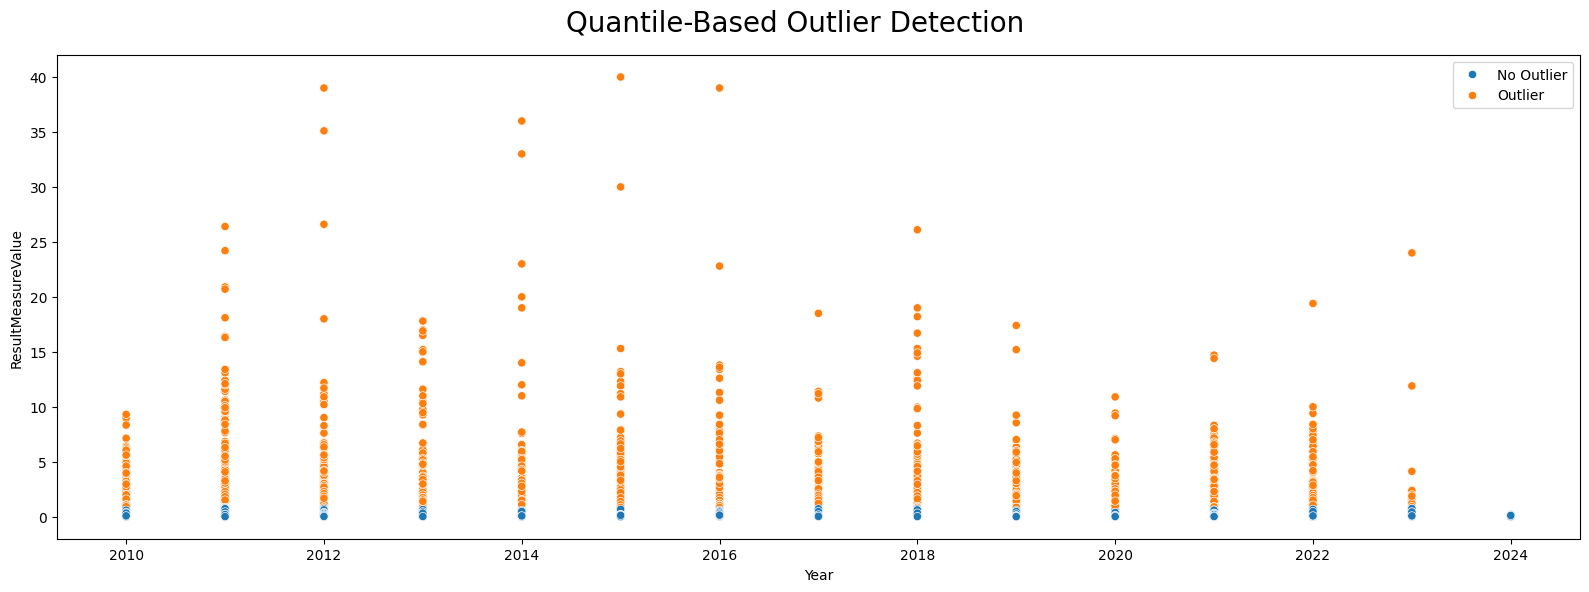

In [14]:
lower_q, upper_q = 0.02, 0.98
lower_value = inspection_data['ResultMeasureValue'].quantile(lower_q)
upper_value = inspection_data['ResultMeasureValue'].quantile(upper_q)

mask = (lower_value <= inspection_data.ResultMeasureValue) & (inspection_data.ResultMeasureValue <= upper_value)## create mask that differentiates between outlier and no outlier.
fig, ax = plt.subplots(figsize=(16, 6))## create a plot
fig.suptitle('Quantile-Based Outlier Detection', size=20) ## create title
sns.scatterplot(data=inspection_data, x='Year', y='ResultMeasureValue', hue=np.where(mask, 'No Outlier', 'Outlier'), ax=ax) ## apply color to outlier/no outlier
plt.tight_layout() ##makes sure that all variables and axes are readable
plt.show()



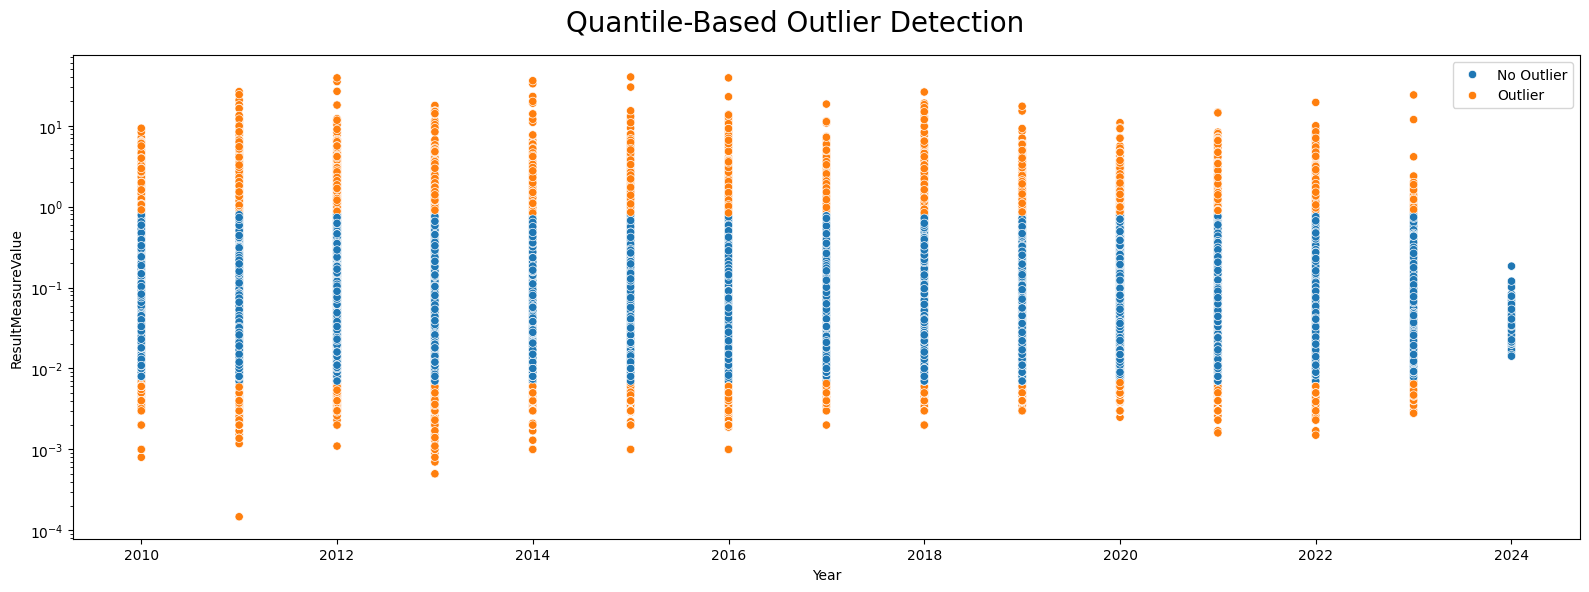

In [15]:
lower_q, upper_q = 0.02, 0.98
lower_value = inspection_data['ResultMeasureValue'].quantile(lower_q)
upper_value = inspection_data['ResultMeasureValue'].quantile(upper_q)

# Create a mask that differentiates between outliers and non-outliers
mask = (lower_value <= inspection_data['ResultMeasureValue']) & (inspection_data['ResultMeasureValue'] <= upper_value)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 6))
fig.suptitle('Quantile-Based Outlier Detection', size=20)

# Plot data points colored based on whether they are outliers or not
sns.scatterplot(data=inspection_data, x='Year', y='ResultMeasureValue', hue=np.where(mask, 'No Outlier', 'Outlier'), ax=ax)

# Set x-axis and y-axis to logarithmic scale
ax.set_yscale('log')

# Make sure that all variables and axes are readable
plt.tight_layout()

# Show the plot
plt.show()

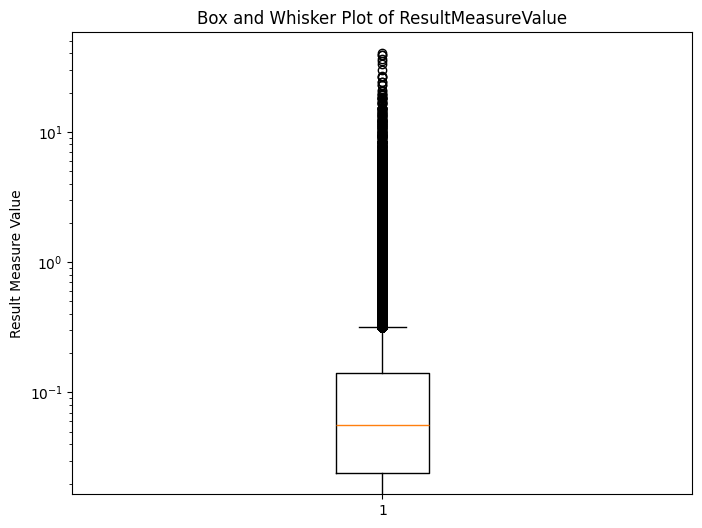

In [16]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.boxplot(inspection_data['ResultMeasureValue'])
plt.title('Box and Whisker Plot of ResultMeasureValue')
plt.ylabel('Result Measure Value')
plt.yscale('log')

plt.show()

## State-level descriptive stats

In [17]:
metrics.groupby('State')['all_years_mean'].mean().sort_values(ascending=False)

State
Illinois        0.207723
Minnesota       0.161623
Ohio            0.152892
Indiana         0.128839
Wisconsin       0.104738
New York        0.072345
Pennsylvania    0.060708
Michigan        0.050669
Name: all_years_mean, dtype: float64

In [54]:
metrics.groupby('State')['perc_num_years_missing'].mean().sort_values(ascending=False)

State
Indiana         0.929398
New York        0.684722
Ohio            0.660784
Wisconsin       0.579861
Michigan        0.496835
Illinois        0.143791
Pennsylvania    0.074627
Minnesota       0.010536
Name: perc_num_years_missing, dtype: float64

## Calculating Exponential Moving Average For Each County

In [55]:
transposed_data = data.transpose()
ema_data = transposed_data.apply(lambda col: col.ewm(span=3, adjust=False).mean(), axis=0)
ema_data.transpose()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
CountyState,,,,,,,,,,,,,
Adams County-Illinois,0.212773,0.148025,0.113993,0.101297,0.142648,0.155805,0.125831,0.153146,0.223240,0.231639,0.216570,0.152316,0.133108
Adams County-Indiana,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.325659,0.325659,0.325659,0.325659,0.325659
Adams County-Pennsylvania,NaN,0.038800,0.126837,0.126837,0.048612,0.028906,0.027185,0.020718,0.018859,0.020114,0.052390,0.033445,0.033445
Adams County-Wisconsin,NaN,NaN,NaN,NaN,0.058500,0.051750,0.051750,0.051750,0.051750,0.044828,0.036582,0.036941,0.034343
Aitkin County-Minnesota,0.048714,0.052887,0.053853,0.039681,0.038084,0.040806,0.046585,0.046392,0.049557,0.043059,0.039218,0.037133,0.089960
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming County-New York,0.122400,0.080277,0.080277,0.080277,0.080277,0.080277,0.080277,0.080277,0.080277,0.080277,0.080277,0.080277,0.080277
Wyoming County-Pennsylvania,0.056833,0.052944,0.062041,0.062197,0.055726,0.086404,0.067488,0.057048,0.051498,0.044919,0.043769,0.044435,0.046567
Yates County-New York,NaN,NaN,0.008390,0.008390,0.008390,0.008390,0.008390,0.008390,0.008390,0.008390,0.008390,0.008390,0.008390


In [56]:
ema_data

CountyState,Adams County-Illinois,Adams County-Indiana,Adams County-Pennsylvania,Adams County-Wisconsin,Aitkin County-Minnesota,Albany County-New York,Alcona County-Michigan,Alexander County-Illinois,Alger County-Michigan,Allegan County-Michigan,...,Wood County-Ohio,Wood County-Wisconsin,Woodford County-Illinois,Wright County-Minnesota,Wyandot County-Ohio,Wyoming County-New York,Wyoming County-Pennsylvania,Yates County-New York,Yellow Medicine County-Minnesota,York County-Pennsylvania
2010,0.212773,0.250000,NaN,NaN,0.048714,0.046760,NaN,0.584750,0.016400,0.107167,...,0.145393,NaN,0.101000,0.141950,0.147750,0.122400,0.056833,NaN,0.223333,0.092379
2011,0.148025,0.250000,0.038800,NaN,0.052887,0.050249,NaN,0.382658,0.014569,0.094478,...,0.129071,NaN,0.101000,0.148129,0.215486,0.080277,0.052944,NaN,0.214309,0.101742
2012,0.113993,0.250000,0.126837,NaN,0.053853,0.051247,NaN,0.277327,0.013100,0.079120,...,0.110350,NaN,0.101000,0.157772,0.180687,0.080277,0.062041,0.00839,0.214324,0.101799
2013,0.101297,0.250000,0.126837,NaN,0.039681,0.050906,NaN,0.238663,0.015632,0.081644,...,0.132897,NaN,0.117333,0.112170,0.143969,0.080277,0.062197,0.00839,0.267317,0.103042
2014,0.142648,0.250000,0.048612,0.058500,0.038084,0.050540,0.031500,0.243832,0.019797,0.068072,...,0.118421,0.113000,0.133479,0.128881,0.102443,0.080277,0.055726,0.00839,0.276039,0.098640
2015,0.155805,0.250000,0.028906,0.051750,0.040806,0.038397,0.023917,0.270734,0.014411,0.054136,...,0.126850,0.092667,0.116276,0.133394,0.100471,0.080277,0.086404,0.00839,0.228350,0.109399
2016,0.125831,0.250000,0.027185,0.051750,0.046585,0.038397,0.023917,0.272912,0.015683,0.050938,...,0.126850,0.092667,0.116276,0.118114,0.100471,0.080277,0.067488,0.00839,0.184201,0.100476
2017,0.153146,0.250000,0.020718,0.051750,0.046392,0.038397,0.023917,0.254831,0.015204,0.052135,...,0.126850,0.092667,0.116276,0.115614,0.100471,0.080277,0.057048,0.00839,0.173012,0.097505
2018,0.223240,0.325659,0.018859,0.051750,0.049557,0.038397,0.023917,0.279624,0.017758,0.068512,...,0.126850,0.092667,0.116276,0.124859,0.100471,0.080277,0.051498,0.00839,0.259803,0.103424
2019,0.231639,0.325659,0.020114,0.044828,0.043059,0.038397,0.023917,0.216700,0.017127,0.071912,...,0.126850,0.183674,0.116276,0.111994,0.100471,0.080277,0.044919,0.00839,0.255978,0.097347


In [59]:
metrics.groupby('State')['last_5_years_avg'].mean().sort_values(ascending=False)

State
Illinois        0.196932
Minnesota       0.165110
Ohio            0.155857
Indiana         0.152126
Wisconsin       0.108835
Pennsylvania    0.058672
Michigan        0.053780
New York        0.040468
Name: last_5_years_avg, dtype: float64

In [60]:
metrics.groupby('State')['last_5_years_avg'].median().sort_values(ascending=False)

State
Minnesota       0.173803
Ohio            0.172077
Illinois        0.148887
Indiana         0.108776
Wisconsin       0.094906
Pennsylvania    0.043218
New York        0.041500
Michigan        0.029500
Name: last_5_years_avg, dtype: float64

## Times Series Analysis - Mann-Kendall Test

In [19]:
modeling_pivot = pd.read_csv('modeling_pivot.csv')
modeling_pivot.drop(columns=['2023', '2024'], inplace=True)
modeling_prepivot = pd.read_csv('modeling_pre-pivot.csv')
modeling_pivot

,CountyState,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Adams County-Illinois,0.212773,0.083278,0.079962,0.088600,0.184000,0.168962,0.095857,0.180462,0.293333,0.240038,0.201500,0.088063,0.113900
1,Adams County-Indiana,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.326250,NaN,NaN,NaN,NaN
2,Adams County-Pennsylvania,NaN,0.038800,0.214875,NaN,0.009500,0.009200,0.025464,0.014250,0.017000,0.021368,0.084667,0.014500,NaN
3,Adams County-Wisconsin,NaN,NaN,NaN,NaN,0.058500,0.045000,NaN,NaN,NaN,0.043963,0.028336,0.037300,0.031746
4,Aitkin County-Minnesota,0.048714,0.057060,0.054819,0.025509,0.036486,0.043529,0.052363,0.046199,0.052723,0.036561,0.035376,0.035049,0.142786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Wyoming County-New York,0.122400,0.038155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620,Wyoming County-Pennsylvania,0.056833,0.049056,0.071138,0.062353,0.049254,0.117083,0.048571,0.046608,0.045949,0.038340,0.042619,0.045100,0.048700
621,Yates County-New York,NaN,NaN,0.008390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,Yellow Medicine County-Minnesota,0.223333,0.205284,0.214338,0.320311,0.284762,0.180660,0.140053,0.161822,0.346594,0.252153,0.146827,0.118061,0.228598


In [20]:
na_counts = modeling_pivot.isna().sum(axis=1)

# Identify rows with 6 or more NaN values
rows_to_drop = na_counts[na_counts >= 6].index

# Drop rows with 6 or more NaN values
modeling_pivot.drop(index=rows_to_drop, inplace=True)

In [21]:
modeling_pivot.isna().sum()

CountyState     0
2010            9
2011            9
2012           10
2013           16
2014            9
2015            7
2016            7
2017            6
2018            8
2019           20
2020           16
2021           19
2022           28
dtype: int64

In [22]:
selected_columns = ['CountyState', 'ActivityLocation/LatitudeMeasure', 'ActivityLocation/LongitudeMeasure']
df_selected = modeling_prepivot[selected_columns]

# Grouping by 'CountyState' and taking the mean of Latitude and Longitude
county_lat_long = df_selected.groupby('CountyState').mean().reset_index()
county_lat_long

,CountyState,ActivityLocation/LatitudeMeasure,ActivityLocation/LongitudeMeasure
0,Adams County-Illinois,40.033278,-91.321992
1,Adams County-Indiana,40.753729,-84.893613
2,Adams County-Pennsylvania,39.881735,-77.333156
3,Adams County-Wisconsin,43.991772,-89.718637
4,Aitkin County-Minnesota,46.498535,-93.497718
...,...,...,...
619,Wyoming County-New York,42.797602,-78.232635
620,Wyoming County-Pennsylvania,41.542511,-75.894631
621,Yates County-New York,42.573500,-76.912600
622,Yellow Medicine County-Minnesota,44.717571,-95.651132


In [23]:
data_for_imputation = modeling_pivot.merge(county_lat_long, on='CountyState', how='left')
data_for_imputation

,CountyState,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,ActivityLocation/LatitudeMeasure,ActivityLocation/LongitudeMeasure
0,Adams County-Illinois,0.212773,0.083278,0.079962,0.088600,0.184000,0.168962,0.095857,0.180462,0.293333,0.240038,0.201500,0.088063,0.113900,40.033278,-91.321992
1,Adams County-Pennsylvania,NaN,0.038800,0.214875,NaN,0.009500,0.009200,0.025464,0.014250,0.017000,0.021368,0.084667,0.014500,NaN,39.881735,-77.333156
2,Aitkin County-Minnesota,0.048714,0.057060,0.054819,0.025509,0.036486,0.043529,0.052363,0.046199,0.052723,0.036561,0.035376,0.035049,0.142786,46.498535,-93.497718
3,Alexander County-Illinois,0.584750,0.180567,0.171995,0.200000,0.249000,0.297636,0.275091,0.236750,0.304417,0.153776,0.122500,0.189500,0.161750,37.209064,-89.431637
4,Alger County-Michigan,0.016400,0.012737,0.011631,0.018164,0.023962,0.009025,0.016956,0.014725,0.020311,0.016496,0.013170,0.028004,0.048000,46.540834,-86.369967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,Winona County-Minnesota,0.261445,0.160177,0.096581,0.415714,0.248422,0.108647,0.157008,0.378656,0.237159,0.346346,0.243365,0.121563,0.445073,44.083504,-91.896860
288,Wright County-Minnesota,0.141950,0.154308,0.167416,0.066568,0.145592,0.137908,0.102833,0.113114,0.134104,0.099129,0.106389,0.091793,0.169853,45.197059,-93.990254
289,Wyoming County-Pennsylvania,0.056833,0.049056,0.071138,0.062353,0.049254,0.117083,0.048571,0.046608,0.045949,0.038340,0.042619,0.045100,0.048700,41.542511,-75.894631
290,Yellow Medicine County-Minnesota,0.223333,0.205284,0.214338,0.320311,0.284762,0.180660,0.140053,0.161822,0.346594,0.252153,0.146827,0.118061,0.228598,44.717571,-95.651132


In [24]:
data_for_imputation.set_index('CountyState', inplace=True)

In [25]:
X = data_for_imputation
imputer = KNNImputer(n_neighbors=2)
imputed_values = imputer.fit_transform(X)
imputed_df = pd.DataFrame(imputed_values, columns=X.columns, index=X.index)

In [26]:
imputed_df.isna().sum()

2010                                 0
2011                                 0
2012                                 0
2013                                 0
2014                                 0
2015                                 0
2016                                 0
2017                                 0
2018                                 0
2019                                 0
2020                                 0
2021                                 0
2022                                 0
ActivityLocation/LatitudeMeasure     0
ActivityLocation/LongitudeMeasure    0
dtype: int64

In [27]:
imputed_df.to_csv('imputed_df.csv')

In [28]:
imputed_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,ActivityLocation/LatitudeMeasure,ActivityLocation/LongitudeMeasure
CountyState,,,,,,,,,,,,,,,
Adams County-Illinois,0.212773,0.083278,0.079962,0.088600,0.184000,0.168962,0.095857,0.180462,0.293333,0.240038,0.201500,0.088063,0.113900,40.033278,-91.321992
Adams County-Pennsylvania,0.055893,0.038800,0.214875,0.047014,0.009500,0.009200,0.025464,0.014250,0.017000,0.021368,0.084667,0.014500,0.047937,39.881735,-77.333156
Aitkin County-Minnesota,0.048714,0.057060,0.054819,0.025509,0.036486,0.043529,0.052363,0.046199,0.052723,0.036561,0.035376,0.035049,0.142786,46.498535,-93.497718
Alexander County-Illinois,0.584750,0.180567,0.171995,0.200000,0.249000,0.297636,0.275091,0.236750,0.304417,0.153776,0.122500,0.189500,0.161750,37.209064,-89.431637
Alger County-Michigan,0.016400,0.012737,0.011631,0.018164,0.023962,0.009025,0.016956,0.014725,0.020311,0.016496,0.013170,0.028004,0.048000,46.540834,-86.369967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Winona County-Minnesota,0.261445,0.160177,0.096581,0.415714,0.248422,0.108647,0.157008,0.378656,0.237159,0.346346,0.243365,0.121563,0.445073,44.083504,-91.896860
Wright County-Minnesota,0.141950,0.154308,0.167416,0.066568,0.145592,0.137908,0.102833,0.113114,0.134104,0.099129,0.106389,0.091793,0.169853,45.197059,-93.990254
Wyoming County-Pennsylvania,0.056833,0.049056,0.071138,0.062353,0.049254,0.117083,0.048571,0.046608,0.045949,0.038340,0.042619,0.045100,0.048700,41.542511,-75.894631


In [10]:
#%pip install pymannkendall

  Obtaining dependency information for pymannkendall from https://files.pythonhosted.org/packages/ee/95/ba23af664f573022daea4bf25c3b69794a77c966ce6c0e3ce13f12117f4f/pymannkendall-1.4.3-py3-none-any.whl.metadata

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [63]:
imputed_df_copy = imputed_df.copy()
imputed_df_copy.reset_index(inplace=True)
imputed_df_copy.drop(columns="CountyState", inplace=True)

In [65]:
numpy_arrays = imputed_df_copy.values

In [66]:
# Function to perform Mann-Kendall Trend Test on each time series in the dataset
def mann_kendall_test(data):
    results = []
    for i, row in enumerate(data):
        result = mk.original_test(row)
        results.append({'Time Series': f'Time Series {i+1}', 'Trend': result.trend,
                        'Slope': result.slope, 'Intercept': result.intercept, 'p-value': result.p})
    return pd.DataFrame(results)

# Perform Mann-Kendall Trend Test on the dataset
results_df = mann_kendall_test(numpy_arrays)

print(results_df)

         Time Series       Trend     Slope  Intercept   p-value
0      Time Series 1    no trend  0.002811   0.149284  0.552615
1      Time Series 2    no trend -0.002179   0.040717  0.692181
2      Time Series 3    no trend -0.000614   0.050497  0.620691
3      Time Series 4    no trend -0.008500   0.259500  0.322300
4      Time Series 5    no trend  0.000829   0.010693  0.234955
..               ...         ...       ...        ...       ...
287  Time Series 288    no trend  0.004022   0.215210  0.692181
288  Time Series 289    no trend -0.003668   0.159783  0.322300
289  Time Series 290  decreasing -0.001339   0.058076  0.047761
290  Time Series 291    no trend -0.007244   0.265044  0.428480
291  Time Series 292    no trend -0.000594   0.098691  0.488422

[292 rows x 5 columns]


In [67]:
results_df.Trend.value_counts()

no trend      270
decreasing     16
increasing      6
Name: Trend, dtype: int64

In [69]:
imputed_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,ActivityLocation/LatitudeMeasure,ActivityLocation/LongitudeMeasure
CountyState,,,,,,,,,,,,,,,
Adams County-Illinois,0.212773,0.083278,0.079962,0.088600,0.184000,0.168962,0.095857,0.180462,0.293333,0.240038,0.201500,0.088063,0.113900,40.033278,-91.321992
Adams County-Pennsylvania,0.055893,0.038800,0.214875,0.047014,0.009500,0.009200,0.025464,0.014250,0.017000,0.021368,0.084667,0.014500,0.047937,39.881735,-77.333156
Aitkin County-Minnesota,0.048714,0.057060,0.054819,0.025509,0.036486,0.043529,0.052363,0.046199,0.052723,0.036561,0.035376,0.035049,0.142786,46.498535,-93.497718
Alexander County-Illinois,0.584750,0.180567,0.171995,0.200000,0.249000,0.297636,0.275091,0.236750,0.304417,0.153776,0.122500,0.189500,0.161750,37.209064,-89.431637
Alger County-Michigan,0.016400,0.012737,0.011631,0.018164,0.023962,0.009025,0.016956,0.014725,0.020311,0.016496,0.013170,0.028004,0.048000,46.540834,-86.369967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Winona County-Minnesota,0.261445,0.160177,0.096581,0.415714,0.248422,0.108647,0.157008,0.378656,0.237159,0.346346,0.243365,0.121563,0.445073,44.083504,-91.896860
Wright County-Minnesota,0.141950,0.154308,0.167416,0.066568,0.145592,0.137908,0.102833,0.113114,0.134104,0.099129,0.106389,0.091793,0.169853,45.197059,-93.990254
Wyoming County-Pennsylvania,0.056833,0.049056,0.071138,0.062353,0.049254,0.117083,0.048571,0.046608,0.045949,0.038340,0.042619,0.045100,0.048700,41.542511,-75.894631


In [78]:
results_df
results_df.to_csv('mann_kendall_results.csv', index=False)

### Inspection of p-values

In [87]:
results_df.sort_values(by='p-value', ascending=False).tail(30)

,Time Series,Trend,Slope,Intercept,p-value
CountyState,,,,,
Murray County-Minnesota,Time Series 192,no trend,0.013296,0.103425,0.074825
Jackson County-Minnesota,Time Series 120,no trend,-0.003499,0.215617,0.060038
St. Clair County-Illinois,Time Series 245,no trend,-0.032714,0.652763,0.060038
Clinton County-New York,Time Series 57,no trend,-0.002333,0.045377,0.060038
Becker County-Minnesota,Time Series 16,no trend,-0.001806,0.071310,0.060038
Essex County-New York,Time Series 85,no trend,-0.000809,0.028514,0.060038
Hubbard County-Minnesota,Time Series 110,no trend,-0.000475,0.023618,0.060038
Coles County-Illinois,Time Series 59,no trend,-0.015012,0.293284,0.060038
Marshall County-Minnesota,Time Series 169,increasing,0.007760,0.124421,0.047761


In [71]:
results_df_trend = results_df[results_df['Trend'] != 'no trend']
results_df_trend

,Time Series,Trend,Slope,Intercept,p-value
CountyState,,,,,
Baraga County-Michigan,Time Series 12,decreasing,-0.001530,0.033733,0.022822
Boone County-Illinois,Time Series 26,decreasing,-0.004880,0.113474,0.004101
Carbon County-Pennsylvania,Time Series 37,increasing,0.001301,0.009890,0.013348
Cass County-Minnesota,Time Series 41,decreasing,-0.001396,0.037377,0.029448
Champaign County-Illinois,Time Series 43,decreasing,-0.029547,0.589243,0.022822
Chisago County-Minnesota,Time Series 49,decreasing,-0.004355,0.106879,0.010072
Crawford County-Illinois,Time Series 64,decreasing,-0.008463,0.249673,0.013348
Dodge County-Minnesota,Time Series 75,decreasing,-0.006379,0.179763,0.017531
Dutchess County-New York,Time Series 80,decreasing,-0.003041,0.077304,0.029448


In [72]:
results_df_trend

,Time Series,Trend,Slope,Intercept,p-value
CountyState,,,,,
Baraga County-Michigan,Time Series 12,decreasing,-0.001530,0.033733,0.022822
Boone County-Illinois,Time Series 26,decreasing,-0.004880,0.113474,0.004101
Carbon County-Pennsylvania,Time Series 37,increasing,0.001301,0.009890,0.013348
Cass County-Minnesota,Time Series 41,decreasing,-0.001396,0.037377,0.029448
Champaign County-Illinois,Time Series 43,decreasing,-0.029547,0.589243,0.022822
Chisago County-Minnesota,Time Series 49,decreasing,-0.004355,0.106879,0.010072
Crawford County-Illinois,Time Series 64,decreasing,-0.008463,0.249673,0.013348
Dodge County-Minnesota,Time Series 75,decreasing,-0.006379,0.179763,0.017531
Dutchess County-New York,Time Series 80,decreasing,-0.003041,0.077304,0.029448


In [75]:
metrics = pd.merge(metrics, results_df, on='CountyState')

In [76]:
metrics

,CountyState,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,num_years_missing,perc_num_years_missing,County,State,last_5_years_avg,Time Series,Trend,Slope,Intercept,p-value
0,Adams County-Illinois,0.212773,0.083278,0.079962,0.088600,0.184000,0.168962,0.095857,0.180462,0.293333,...,0,0.00,Adams County,Illinois,0.187367,Time Series 1,no trend,0.002811,0.149284,0.552615
1,Adams County-Pennsylvania,NaN,0.038800,0.214875,NaN,0.009500,0.009200,0.025464,0.014250,0.017000,...,3,0.25,Adams County,Pennsylvania,0.034384,Time Series 2,no trend,-0.002179,0.040717,0.692181
2,Aitkin County-Minnesota,0.048714,0.057060,0.054819,0.025509,0.036486,0.043529,0.052363,0.046199,0.052723,...,0,0.00,Aitkin County,Minnesota,0.060499,Time Series 3,no trend,-0.000614,0.050497,0.620691
3,Alexander County-Illinois,0.584750,0.180567,0.171995,0.200000,0.249000,0.297636,0.275091,0.236750,0.304417,...,0,0.00,Alexander County,Illinois,0.186389,Time Series 4,no trend,-0.008500,0.259500,0.322300
4,Alger County-Michigan,0.016400,0.012737,0.011631,0.018164,0.023962,0.009025,0.016956,0.014725,0.020311,...,0,0.00,Alger County,Michigan,0.025196,Time Series 5,no trend,0.000829,0.010693,0.234955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,Winona County-Minnesota,0.261445,0.160177,0.096581,0.415714,0.248422,0.108647,0.157008,0.378656,0.237159,...,0,0.00,Winona County,Minnesota,0.278701,Time Series 288,no trend,0.004022,0.215210,0.692181
288,Wright County-Minnesota,0.141950,0.154308,0.167416,0.066568,0.145592,0.137908,0.102833,0.113114,0.134104,...,0,0.00,Wright County,Minnesota,0.120254,Time Series 289,no trend,-0.003668,0.159783,0.322300
289,Wyoming County-Pennsylvania,0.056833,0.049056,0.071138,0.062353,0.049254,0.117083,0.048571,0.046608,0.045949,...,0,0.00,Wyoming County,Pennsylvania,0.044142,Time Series 290,decreasing,-0.001339,0.058076,0.047761
290,Yellow Medicine County-Minnesota,0.223333,0.205284,0.214338,0.320311,0.284762,0.180660,0.140053,0.161822,0.346594,...,0,0.00,Yellow Medicine County,Minnesota,0.218447,Time Series 291,no trend,-0.007244,0.265044,0.428480


In [89]:
metrics[metrics['State'] == "Michigan"]

,CountyState,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,num_years_missing,perc_num_years_missing,County,State,last_5_years_avg,Time Series,Trend,Slope,Intercept,p-value
4,Alger County-Michigan,0.016400,0.012737,0.011631,0.018164,0.023962,0.009025,0.016956,0.014725,0.020311,...,0,0.000000,Alger County,Michigan,0.025196,Time Series 5,no trend,0.000829,0.010693,0.234955
5,Allegan County-Michigan,0.107167,0.081789,0.063762,0.084168,0.054500,0.040200,0.047739,0.053333,0.084889,...,0,0.000000,Allegan County,Michigan,0.074170,Time Series 6,no trend,-0.000810,0.080980,0.692181
8,Antrim County-Michigan,NaN,NaN,0.014943,0.002950,0.005467,0.010329,0.004300,0.005833,0.004625,...,2,0.166667,Antrim County,Michigan,0.008642,Time Series 9,no trend,-0.000174,0.010353,0.921159
11,Baraga County-Michigan,0.027881,0.029374,0.035620,0.024417,0.020113,0.019123,0.029139,0.018917,0.023024,...,3,0.250000,Baraga County,Michigan,0.019891,Time Series 12,decreasing,-0.001530,0.033733,0.022822
19,Benzie County-Michigan,0.013088,0.063726,0.016599,0.014745,0.028905,0.009287,0.009857,0.012630,0.019045,...,0,0.000000,Benzie County,Michigan,0.014968,Time Series 20,no trend,-0.000557,0.016989,0.428480
21,Berrien County-Michigan,NaN,0.077750,NaN,0.048000,0.051429,0.126250,0.052000,0.176067,0.041000,...,3,0.250000,Berrien County,Michigan,0.147750,Time Series 22,no trend,0.004750,0.107345,0.488422
39,Cass County-Michigan,NaN,NaN,NaN,0.022720,0.030077,0.080952,0.053333,0.026896,0.027183,...,4,0.333333,Cass County,Michigan,0.246796,Time Series 40,no trend,0.006656,0.016064,0.276278
43,Charlevoix County-Michigan,0.005267,0.004029,NaN,0.004670,0.008289,0.011662,0.004250,0.012330,0.009763,...,1,0.083333,Charlevoix County,Michigan,0.010135,Time Series 44,no trend,0.000044,0.007125,0.843085
46,Chippewa County-Michigan,0.039113,0.038358,0.032032,0.051295,0.045658,0.077299,0.034527,0.054226,0.092519,...,0,0.000000,Chippewa County,Michigan,0.064737,Time Series 47,no trend,0.001665,0.036059,0.373053
82,Emmet County-Michigan,0.013370,0.007753,0.005929,0.008144,0.011782,0.015000,0.003940,0.007178,0.011648,...,0,0.000000,Emmet County,Michigan,0.012627,Time Series 83,no trend,-0.000072,0.008260,0.552615


In [77]:
pd.pivot_table(metrics, index='State', columns='Trend', aggfunc=len, fill_value=0)

2010                           2011                      \
Trend        decreasing increasing no trend decreasing increasing no trend   
State                                                                        
Illinois              8          0       76          8          0       76   
Indiana               0          0        2          0          0        2   
Michigan              2          1       24          2          1       24   
Minnesota             3          2       82          3          2       82   
New York              1          0        9          1          0        9   
Ohio                  0          0        4          0          0        4   
Pennsylvania          2          3       56          2          3       56   
Wisconsin             0          0       17          0          0       17   

                   2012                           2013  ... last_5_years_avg  \
Trend        decreasing increasing no trend decreasing  ...         no trend   
State                                                   ...                    
Illinois              8          0       76          8  ...               76   
Indiana               0          0        2          0  ...                2   
Michigan              2          1       24          2  ...               24   
Minnesota             3          2       82          3  ...               82   
New York              1          0        9          1  ...                9   
Ohio                  0          0        4          0  ...                4   
Pennsylvania          2          3       56          2  ...               56   
Wisconsin             0          0       17          0  ...               17   

             num_years_missing                        p-value             \
Trend               decreasing increasing no trend decreasing increasing   
State                                                                      
Illinois                     8          0       76          8          0   
Indiana                      0          0        2          0          0   
Michigan                     2          1       24          2          1   
Minnesota                    3          2       82          3          2   
New York                     1          0        9          1          0   
Ohio                         0          0        4          0          0   
Pennsylvania                 2          3       56          2          3   
Wisconsin                    0          0       17          0          0   

                      perc_num_years_missing                      
Trend        no trend             decreasing increasing no trend  
State                                                             
Illinois           76                      8          0       76  
Indiana             2                      0          0        2  
Michigan           24                      2          1       24  
Minnesota          82                      3          2       82  
New York            9                      1          0        9  
Ohio                4                      0          0        4  
Pennsylvania       56                      2          3       56  
Wisconsin          17                      0          0       17  

[8 rows x 69 columns]